### Load the Data, split and pad it

In [1]:
# import functions from scripts directory
import sys
sys.path.insert(1, '../../scripts/') # caution: path[0] is reserved for script path (or '' in REPL)

import audio_utils
from spec2png import spec2png
import pandas as pd

In [3]:
pd.read_csv("../../data/annotations_small.csv")

,Unnamed: 0,id,diagnosis,train_test,filename,is_healthy
0,0,i101,urti,test,101_1b1_Al_sc_Meditron.wav,0
1,1,i101,urti,test,101_1b1_Pr_sc_Meditron.wav,0
2,2,i102,healthy,test,102_1b1_Ar_sc_Meditron.wav,1
3,3,i103,asthma,train,103_2b2_Ar_mc_LittC2SE.wav,0
4,4,i104,copd,test,104_1b1_Al_sc_Litt3200.wav,0
5,5,i104,copd,test,104_1b1_Ar_sc_Litt3200.wav,0
6,6,i104,copd,test,104_1b1_Ll_sc_Litt3200.wav,0
7,7,i104,copd,test,104_1b1_Lr_sc_Litt3200.wav,0
8,8,i104,copd,test,104_1b1_Pl_sc_Litt3200.wav,0
9,9,i104,copd,test,104_1b1_Pr_sc_Litt3200.wav,0


,id,diagnosis,train_test,filename,is_healthy
0,i101,urti,test,101_1b1_Al_sc_Meditron.wav,0
1,i101,urti,test,101_1b1_Pr_sc_Meditron.wav,0
2,i102,healthy,test,102_1b1_Ar_sc_Meditron.wav,1
3,i103,asthma,train,103_2b2_Ar_mc_LittC2SE.wav,0
4,i104,copd,test,104_1b1_Al_sc_Litt3200.wav,0
5,i104,copd,test,104_1b1_Ar_sc_Litt3200.wav,0
6,i104,copd,test,104_1b1_Ll_sc_Litt3200.wav,0
7,i104,copd,test,104_1b1_Lr_sc_Litt3200.wav,0
8,i104,copd,test,104_1b1_Pl_sc_Litt3200.wav,0
9,i104,copd,test,104_1b1_Pr_sc_Litt3200.wav,0


/Users/louiskrause/neuefische/Respiratory_Disease_Classification/data/images/cls_2/test/health_0/0_i101_1


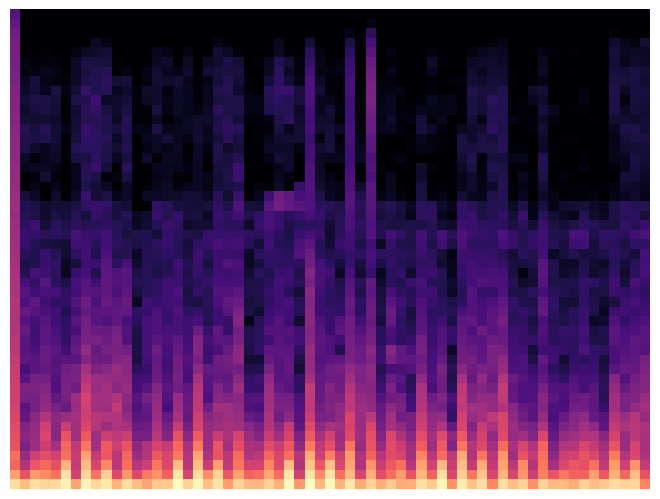

In [6]:
audio_utils.audio2img("../../data/annotations_small.csv")